# TECHWORKS CONSULTING PROJECT

    IMPORTING NECESSARY LIBRARIES

In [131]:
import numpy as np                              
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [132]:
df=pd.read_csv('ML_CASE_STUDY.CSV')

In [133]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

Importing College Data File

In [134]:
college_data=pd.read_csv('Colleges.CSV') 

In [135]:
college_data.rename(columns = {'Tier 1':'Tier1', 'Tier 2':'Tier2', 'Tier 3':'Tier3'}, inplace = True)

In [136]:
college_data.head()

Tier1           Tier2                                       Tier3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [137]:
cities_data=pd.read_csv('cities.CSV')

In [138]:
cities_data.rename(columns = {'Metrio City':'metro', 'non-metro cities':'nonmetro'}, inplace = True)

In [139]:
cities_data.head() 

metro   nonmetro
0     Mumbai   Dehradun
1      Delhi   Durgapur
2    Kolkata    Asansol
3    Chennai   Rourkela
4  Bangalore  Kozhikode

Creating a list of college_data columns

In [140]:
Tier1=college_data["Tier1"].tolist()   
Tier2=college_data["Tier2"].tolist()
Tier3=college_data["Tier3"].tolist()

Creating a list of cities column

In [141]:
metro=cities_data["metro"].tolist()      
non_metro=cities_data["nonmetro"].tolist()

After creating lists of each column,assigns category to the names of record 

In [142]:
for item in df.College:    
    if item in Tier1:
        df["College"].replace(item,"Tier1", inplace=True)
    elif item in Tier2:
        df["College"].replace(item,"Tier2", inplace=True)
    elif item in Tier3:
        df["College"].replace(item,"Tier3", inplace=True)


In [143]:
for item in df.City: ### assigns the category to the names of records
    if item in metro:
        df["City"].replace(item,"metro", inplace=True)
    elif item in non_metro:
        df["City"].replace(item,"nonmetro", inplace=True)

In [144]:
df.head()

College      City       Role  Previous CTC  Previous job change  \
0   Tier2  nonmetro    Manager       55523.0                    3   
1   Tier2  nonmetro  Executive       57081.0                    1   
2   Tier3  nonmetro  Executive       60347.0                    2   
3   Tier3  nonmetro  Executive       49010.0                    2   
4   Tier1  nonmetro  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

finding duplicates

In [145]:
df1 = df[df.duplicated()] 
print(len(df1))

46


creating numerical variable from categorical data 

In [146]:
df=pd.get_dummies(df)    

In [147]:
df.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0       55523.0                    3                66           19  71406.58   
1       57081.0                    1                84           18  68005.87   
2       60347.0                    2                52           28  76764.02   
3       49010.0                    2                81           33  82092.39   
4       57879.0                    4                74           32  73878.10   

   College_Tier1  College_Tier2  College_Tier3  City_metro  City_nonmetro  \
0          False           True          False       False           True   
1          False           True          False       False           True   
2          False          False           True       False           True   
3          False          False           True       False           True   
4           True          False          False       False           True   

   Role_Executive  Role_Manager  
0           False          True  
1            True         False  
2            True         False  
3            True         False  
4            True         False

In [148]:
# Replace True with 1 and False with 0
df['College_Tier1'] = df['College_Tier1'].replace({True: 1, False: 0})
df['College_Tier2'] = df['College_Tier2'].replace({True: 1, False: 0})
df['College_Tier3'] = df['College_Tier3'].replace({True: 1, False: 0})
df['City_metro'] = df['City_metro'].replace({True: 1, False: 0})
df['City_nonmetro'] = df['City_nonmetro'].replace({True: 1, False: 0})
df['Role_Executive'] = df['Role_Executive'].replace({True: 1, False: 0})
df['Role_Manager'] = df['Role_Manager'].replace({True: 1, False: 0})


In [149]:
df.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0       55523.0                    3                66           19  71406.58   
1       57081.0                    1                84           18  68005.87   
2       60347.0                    2                52           28  76764.02   
3       49010.0                    2                81           33  82092.39   
4       57879.0                    4                74           32  73878.10   

   College_Tier1  College_Tier2  College_Tier3  City_metro  City_nonmetro  \
0              0              1              0           0              1   
1              0              1              0           0              1   
2              0              0              1           0              1   
3              0              0              1           0              1   
4              1              0              0           0              1   

   Role_Executive  Role_Manager  
0               0             1  
1               1             0  
2               1             0  
3               1             0  
4               1             0

 deleting  unrequired elements to implement (n-1) rule

In [150]:
del df["College_Tier3"]   
del df["City_nonmetro"]
del df["Role_Executive"]

 Creating dependent and independent variable

In [151]:
x=df.loc[:,df.columns!='CTC']
y=df["CTC"]

In [152]:
x.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0       55523.0                    3                66           19   
1       57081.0                    1                84           18   
2       60347.0                    2                52           28   
3       49010.0                    2                81           33   
4       57879.0                    4                74           32   

   College_Tier1  College_Tier2  City_metro  Role_Manager  
0              0              1           0             1  
1              0              1           0             0  
2              0              0           0             0  
3              0              0           0             0  
4              1              0           0             0

In [153]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

Checks for missing values

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   College_Tier1        1589 non-null   int64  
 6   College_Tier2        1589 non-null   int64  
 7   City_metro           1589 non-null   int64  
 8   Role_Manager         1589 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 111.9 KB


In [155]:
df.describe()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
count   1589.000000          1589.000000       1589.000000  1589.000000   
mean   55518.453744             2.528634         59.855255    39.044682   
std     6655.218445             1.123918         14.935139    14.108875   
min    36990.000000             1.000000         35.000000    18.000000   
25%    50518.000000             2.000000         46.000000    26.000000   
50%    55291.000000             3.000000         60.000000    39.000000   
75%    60109.000000             4.000000         73.000000    51.000000   
max    77911.000000             4.000000         85.000000    64.000000   

                 CTC  College_Tier1  College_Tier2   City_metro  Role_Manager  
count    1589.000000    1589.000000    1589.000000  1589.000000   1589.000000  
mean    75353.278798       0.363751       0.297042     0.514160      0.206419  
std     12587.288237       0.481230       0.457099     0.499957      0.404862  
min     53020.320000       0.000000       0.000000     0.000000      0.000000  
25%     66902.350000       0.000000       0.000000     0.000000      0.000000  
50%     73028.670000       0.000000       0.000000     1.000000      0.000000  
75%     80588.670000       1.000000       1.000000     1.000000      0.000000  
max    123416.990000       1.000000       1.000000     1.000000      1.000000

## Checking for outliers in dataset

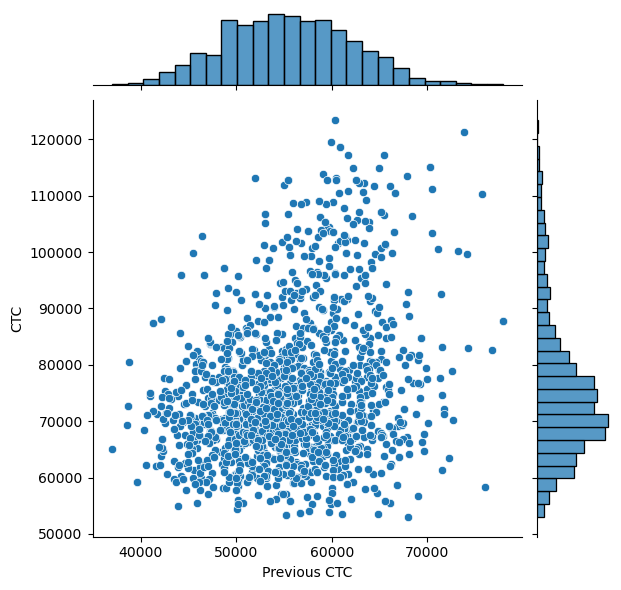

In [156]:
sns.jointplot(x='Previous CTC', y='CTC', data=df)

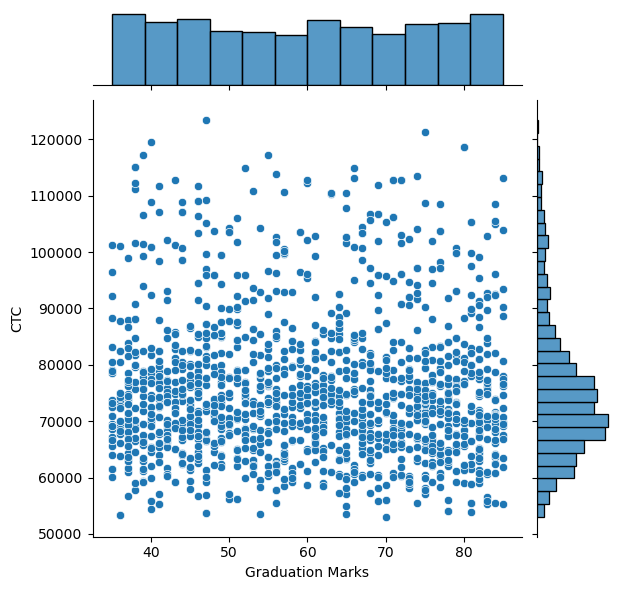

In [157]:
sns.jointplot(x='Graduation Marks', y='CTC', data=df)

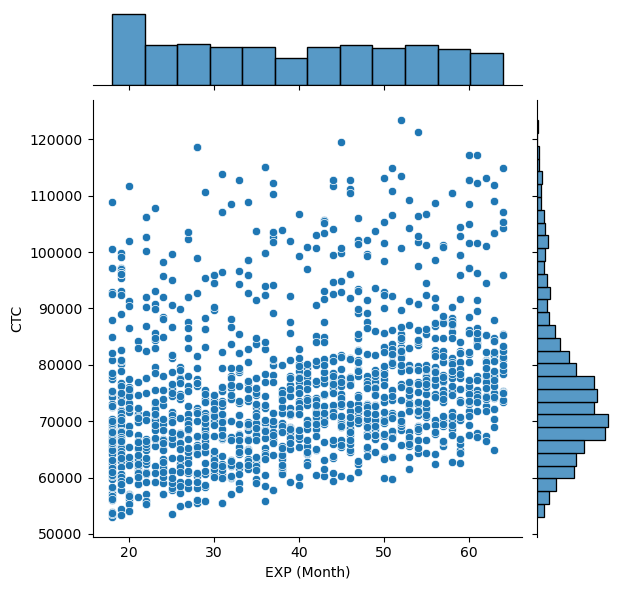

In [158]:
sns.jointplot(x='EXP (Month)', y='CTC', data=df)

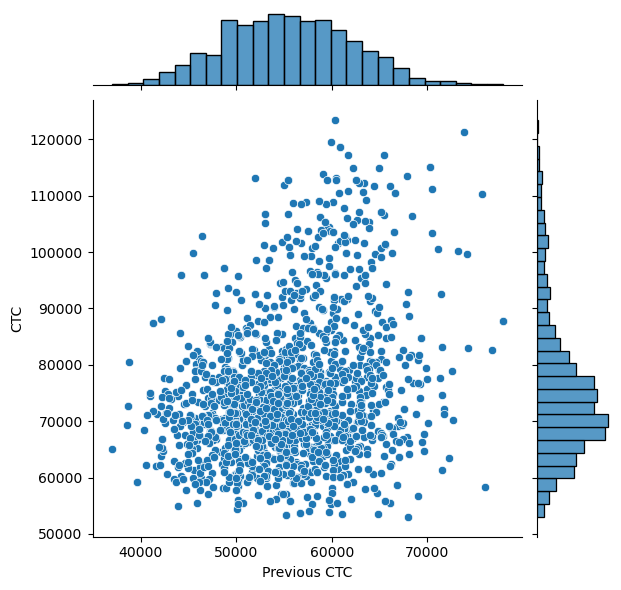

In [159]:
sns.jointplot(x='Previous CTC', y='CTC', data=df)

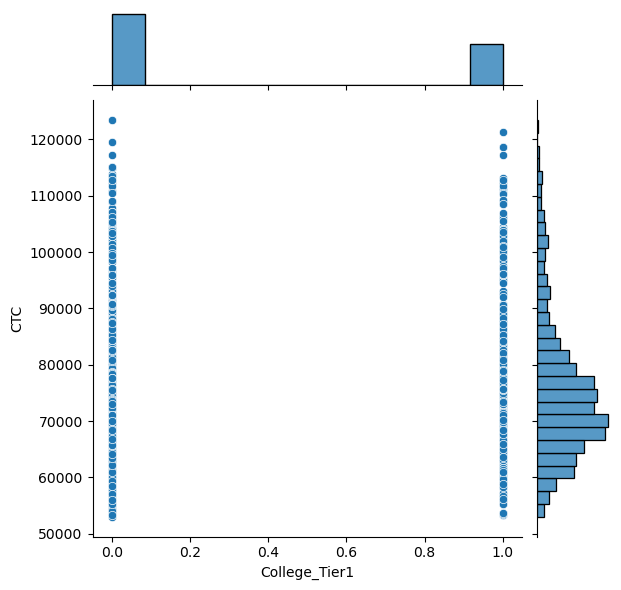

In [160]:
sns.jointplot(x='College_Tier1', y='CTC', data=df)

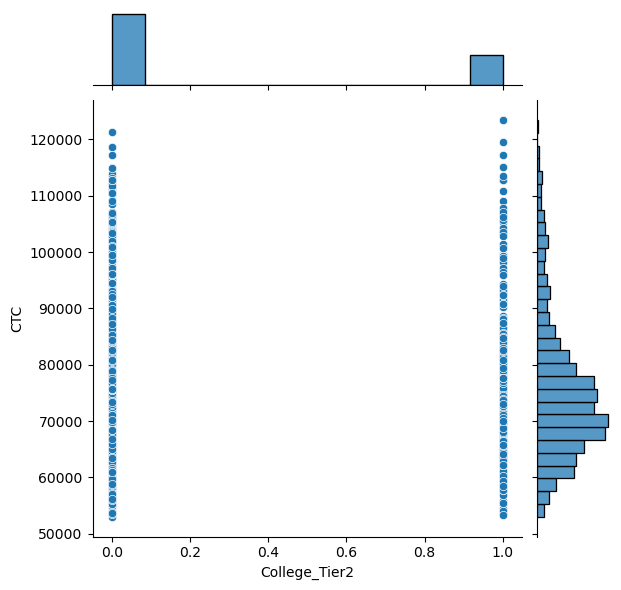

In [161]:
sns.jointplot(x='College_Tier2', y='CTC', data=df)

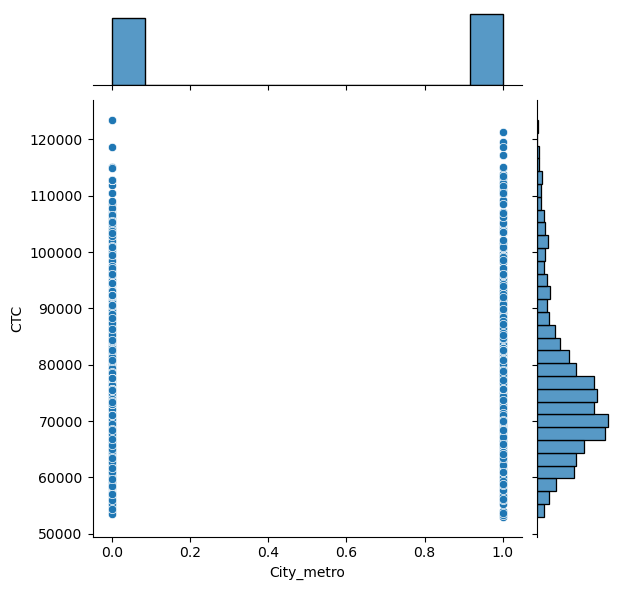

In [162]:
sns.jointplot(x='City_metro', y='CTC', data=df)

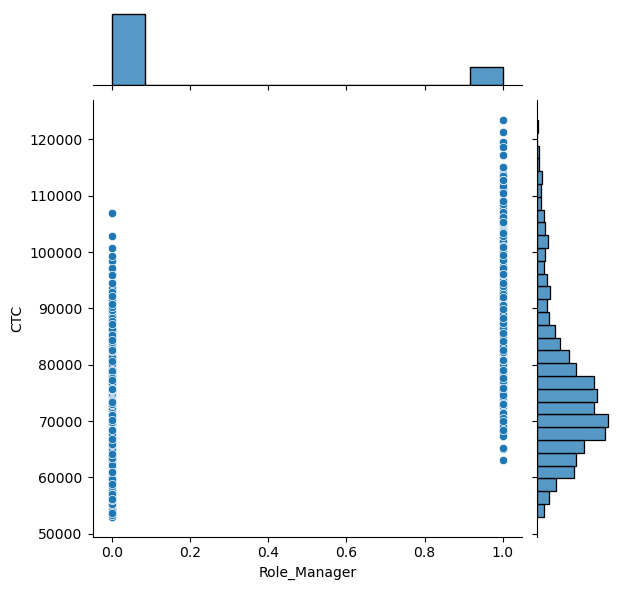

In [163]:
sns.jointplot(x='Role_Manager', y='CTC', data=df)

Finding correlations

In [164]:
df.corr()

Previous CTC  Previous job change  Graduation Marks  \
Previous CTC             1.000000             0.005756         -0.032976   
Previous job change      0.005756             1.000000          0.019267   
Graduation Marks        -0.032976             0.019267          1.000000   
EXP (Month)              0.119163             0.023488         -0.057061   
CTC                      0.258000             0.011370         -0.005450   
College_Tier1           -0.031366             0.045931          0.005666   
College_Tier2           -0.010947             0.004271         -0.018419   
City_metro               0.004644             0.051670         -0.018616   
Role_Manager             0.012321            -0.017150          0.017858   

                     EXP (Month)       CTC  College_Tier1  College_Tier2  \
Previous CTC            0.119163  0.258000      -0.031366      -0.010947   
Previous job change     0.023488  0.011370       0.045931       0.004271   
Graduation Marks       -0.057061 -0.005450       0.005666      -0.018419   
EXP (Month)             1.000000  0.301115      -0.003323      -0.014558   
CTC                     0.301115  1.000000       0.019912       0.012346   
College_Tier1          -0.003323  0.019912       1.000000      -0.491510   
College_Tier2          -0.014558  0.012346      -0.491510       1.000000   
City_metro             -0.023613 -0.020365       0.002135       0.022917   
Role_Manager           -0.026751  0.621311       0.015158      -0.004865   

                     City_metro  Role_Manager  
Previous CTC           0.004644      0.012321  
Previous job change    0.051670     -0.017150  
Graduation Marks      -0.018616      0.017858  
EXP (Month)           -0.023613     -0.026751  
CTC                   -0.020365      0.621311  
College_Tier1          0.002135      0.015158  
College_Tier2          0.022917     -0.004865  
City_metro             1.000000     -0.048671  
Role_Manager          -0.048671      1.000000

Splitting Data for Training and testing split

In [165]:
from sklearn.model_selection import train_test_split                                    
x_train,x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)  
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)                         

(1271, 8) (318, 8) (1271,) (318,)


Statsmodel

In [166]:
import statsmodels.api as sn        
x_const=sn.add_constant(x_train) 

In [167]:
x_const.head

<bound method NDFrame.head of       const  Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
1062    1.0       61410.0                    4                83           59   
215     1.0       59781.0                    1                46           41   
654     1.0       62521.0                    1                70           59   
55      1.0       66624.0                    1                63           58   
1187    1.0       54621.0                    2                52           62   
...     ...           ...                  ...               ...          ...   
763     1.0       54660.0                    3                43           27   
835     1.0       58049.0                    2                51           42   
1216    1.0       52744.0                    4                80           40   
559     1.0       56519.0                    1                64           19   
684     1.0       40632.0                    2                61           33  

In [168]:
lm=sn.OLS(y_train,x_const).fit()

In [169]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 06 Feb 2024   Prob (F-statistic):          7.12e-203
Time:                        17:28:52   Log-Likelihood:                -13327.
No. Observations:                1271   AIC:                         2.667e+04
Df Residuals:                    1262   BIC:                         2.672e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.56e+04   2434.719     14.621      0.000    3.08e+04    4.04e+04
Previous CTC            0.4296      0.037     11.632      0.000       0.357       0.502
Previous job change    91.6241    218.632      0.419      0.675    -337.299     520.547
Graduation Marks       10.1810     16.392      0.621      0.535     -21.978      42.340
EXP (Month)           257.8025     17.473     14.754      0.000     223.523     292.082
College_Tier1         800.7768    583.187      1.373      0.170    -343.347    1944.900
College_Tier2         939.0438    612.572      1.533      0.126    -262.727    2140.815
City_metro            914.5279    489.631      1.868      0.062     -46.053    1875.109
Role_Manager         1.925e+04    602.340     31.963      0.000    1.81e+04    2.04e+04
==============================================================================
Omnibus:                       42.715   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.545
Skew:                           0.424   Prob(JB):                     4.74e-11
Kurtosis:                       3.424   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# #Testing Linear regression Model

In [170]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()     

In [171]:
lr.fit(x_train,y_train)

LinearRegression()

In [172]:
print(lr.intercept_, lr.coef_)

35598.3946282708 [4.29560583e-01 9.16241174e+01 1.01809891e+01 2.57802465e+02
 8.00776831e+02 9.39043793e+02 9.14527889e+02 1.92527381e+04]


In [173]:
from sklearn.metrics import r2_score, mean_squared_error

In [174]:
y_test_a= lr.predict(x_test)
y_train_a= lr.predict(x_train)

In [175]:
r2_score(y_test, y_test_a) 

0.5366674761765406

In [176]:
r2_score(y_train, y_train_a)

0.5335038205027318

In [177]:
mean_squared_error(y_test, y_test_a, squared=False)

8291.641811462556

#Testing Simple Tree regression Model

In [178]:
from sklearn import tree

In [179]:
regtree= tree.DecisionTreeRegressor(max_depth=4)

In [180]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [181]:
y_test_pred= regtree.predict(x_test)

In [182]:
y_train_pred= regtree.predict(x_train)

In [183]:
r2_score(y_test, y_test_pred)

0.603220439065417

In [184]:
r2_score(y_train, y_train_pred)

0.6397831325660944

In [185]:
mean_squared_error(y_test,y_test_pred, squared=False)

7673.063383688379

# Testing Bagging Tree Method

In [186]:
from sklearn import tree              
regtree= tree.DecisionTreeRegressor()

In [187]:
from sklearn.ensemble import BaggingRegressor

In [188]:
bag_regress=BaggingRegressor(base_estimator=regtree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [189]:
bag_regress.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [190]:
y_test_pred= bag_regress.predict(x_test)

In [191]:
y_train_pred= bag_regress.predict(x_train)

In [192]:
r2_score(y_test, y_test_pred) 

0.6601687495371527

In [193]:
r2_score(y_train, y_train_pred)

0.9504135214192306

In [194]:
mean_squared_error(y_test,y_test_pred, squared=False)

7101.102741707642

## Testing Random Forest

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
rf_reg= RandomForestRegressor(n_estimators=1000,n_jobs=-1, random_state=42)

In [197]:
rf_reg.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [198]:
_y_test_pred= rf_reg.predict(x_test)

In [199]:
_y_train_pred= rf_reg.predict(x_train)

In [200]:
r2_score(y_test, _y_test_pred)

0.6604887669890434

In [201]:
r2_score(y_train, _y_train_pred)

0.9504103643046681

In [202]:
mean_squared_error(y_test, _y_test_pred, squared=False)

7097.758417062564

## Testing Gradient Boosting 

In [203]:
from sklearn.ensemble import GradientBoostingRegressor

In [204]:
gbc_reg= GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, max_depth=2,random_state=42)

In [205]:
gbc_reg.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=2, n_estimators=1000,
                          random_state=42)

In [206]:
y_test_pred= gbc_reg.predict(x_test)
y_train_pred= gbc_reg.predict(x_train)

In [207]:
r2_score(y_test, y_test_pred)

0.6181614065288081

In [208]:
r2_score(y_train, y_train_pred)

0.7021349156624

In [209]:
mean_squared_error(y_test, y_test_pred, squared=False)

7527.210308214233

## Testing Adaboost

In [210]:
from sklearn.ensemble import AdaBoostRegressor

In [211]:
ada_reg=AdaBoostRegressor(learning_rate=0.02, n_estimators=1000,random_state=42)

In [212]:
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.02, n_estimators=1000, random_state=42)

In [213]:
y_test_pred= ada_reg.predict(x_test)
y_train_pred= ada_reg.predict(x_train)

In [214]:
r2_score(y_test, y_test_pred)

0.5980794897670065

In [215]:
r2_score(y_train, y_train_pred)

0.625520184407773

In [216]:
mean_squared_error(y_test, y_test_pred, squared=False)

7722.612150489372

## Testing XG BOOST

In [217]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [218]:
import xgboost as xgb

In [219]:
xgb_reg=xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1,random_state=42)

In [220]:
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [221]:
y_test_pred= xgb_reg.predict(x_test)
y_train_pred= xgb_reg.predict(x_train)

In [222]:
r2_score(y_test, y_test_pred)

0.588037101854274

In [223]:
r2_score(y_train, y_train_pred)

0.9999993727312546

In [224]:
mean_squared_error(y_test, y_test_pred, squared=False)

7818.495523342425

## Testing Ridge Regression

In [225]:
from sklearn import preprocessing

In [226]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [227]:
x_train_s=scaler.transform(x_train)

In [228]:
x_test_s=scaler.transform(x_test)

In [229]:
from sklearn.linear_model import Ridge

In [230]:
lm_r=Ridge(alpha=0.5) 

In [231]:
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [232]:
r2_score(y_test,lm_r.predict(x_test_s))

0.53665275816235

In [233]:
r2_score(y_train,lm_r.predict(x_train_s))

0.5335037422609614

In [234]:
mean_squared_error(y_test, y_test_a, squared=False)

8291.641811462556

## Hyperparameter tuning

In [235]:
from sklearn.model_selection import validation_curve

In [236]:
param_range=np.logspace(-2,8,100)

In [237]:
train_scores, test_scores = validation_curve(Ridge(),x_train_s, y_train,param_name= "alpha", param_range=param_range, scoring='r2')

In [238]:
print(train_scores)
print(test_scores)

[[5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074005e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263546e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263546e-01 5.33697521e-01 5.40103263e-01 5.38017138e-01
  5.31074004e-01]
 [5.27263545e-01 5.33697520e-01 5.40103262e-01 5.38017138e-01
  5.31074004e-01]
 [5.27263544e-01 5.33697519e-01 5.40103261e-01 5.38017136e-01
  5.31074002e-01]
 [5.27263542e-01 5.33697517e-01 5.40103259e-01 5.38017134e-01
  5.31074000e-01]
 [5.27263539e-01 5.33697515e-01 5.40103257e-01 5.38017131e-01
  5.31073997e-01]
 [5.27263534e-01 5.33697510e-01 5.401032

In [239]:
train_mean=np.mean(train_scores,axis=1)

In [240]:
test_mean=np.mean(test_scores,axis=1)

In [241]:
train_mean
test_mean

array([ 5.25491734e-01,  5.25491753e-01,  5.25491777e-01,  5.25491807e-01,
        5.25491845e-01,  5.25491892e-01,  5.25491953e-01,  5.25492028e-01,
        5.25492124e-01,  5.25492244e-01,  5.25492396e-01,  5.25492586e-01,
        5.25492825e-01,  5.25493126e-01,  5.25493502e-01,  5.25493972e-01,
        5.25494559e-01,  5.25495289e-01,  5.25496192e-01,  5.25497306e-01,
        5.25498667e-01,  5.25500317e-01,  5.25502289e-01,  5.25504605e-01,
        5.25507251e-01,  5.25510154e-01,  5.25513123e-01,  5.25515772e-01,
        5.25517378e-01,  5.25516664e-01,  5.25511442e-01,  5.25498066e-01,
        5.25470562e-01,  5.25419290e-01,  5.25328913e-01,  5.25175338e-01,
        5.24921225e-01,  5.24509539e-01,  5.23854596e-01,  5.22830151e-01,
        5.21254494e-01,  5.18873427e-01,  5.15343625e-01,  5.10221279e-01,
        5.02963741e-01,  4.92953878e-01,  4.79556173e-01,  4.62207661e-01,
        4.40534912e-01,  4.14472961e-01,  3.84350574e-01,  3.50907402e-01,
        3.15226370e-01,  

In [242]:
max(test_mean)

0.5255173782362379

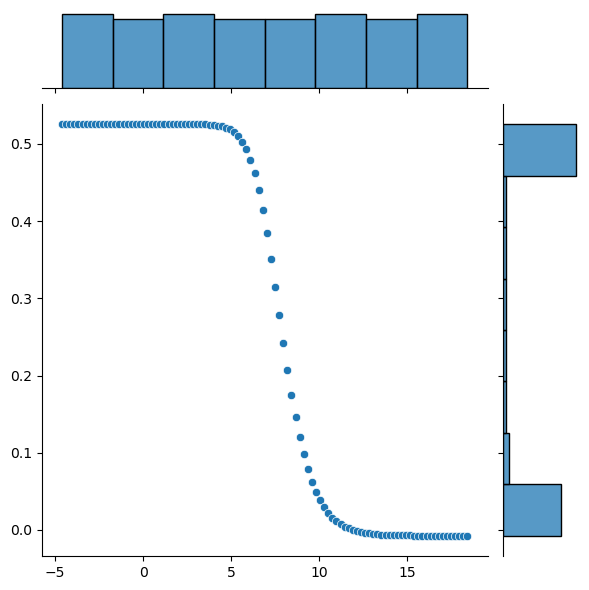

In [243]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [244]:
np.where(test_mean==max(test_mean))

(array([28], dtype=int64),)

In [245]:
param_range[28]

6.7341506577508214

In [246]:
lm_r_best=Ridge(alpha=param_range[28])

In [247]:
lm_r_best.fit(x_train_s,y_train)

Ridge(alpha=6.7341506577508214)

In [248]:
r2_score(y_test,lm_r_best.predict(x_test_s))

0.536457903642095

In [249]:
r2_score(y_train,lm_r_best.predict(x_train_s))

0.5334897646005574

In [250]:
mean_squared_error(y_test, y_test_a, squared=False)

8291.641811462556

## Testing Lasso Regression

In [251]:
from sklearn.linear_model import Lasso 
lasso = (Lasso(alpha=1.0)) 

In [252]:
lasso.fit(x_train, y_train) 

Lasso()

In [253]:
y_pred = lasso.predict(x_test)

In [254]:
y_pred_train = lasso.predict(x_train)

In [255]:
y_pred

array([69072.39716352, 64190.93496495, 63665.64449733, 71992.008636  ,
       76693.82777331, 88791.19021545, 69212.66290169, 71356.19274913,
       70946.45551329, 73638.39825601, 72260.00311212, 78622.34491173,
       85445.40410268, 78144.76584581, 77097.32210664, 94041.84457433,
       66345.54976791, 69001.67808518, 67239.72436689, 81840.55287612,
       91213.2786312 , 96643.08825037, 71194.64570996, 67446.46842045,
       72582.18439138, 68268.95976531, 73630.88765749, 94585.36394433,
       72138.50935361, 74404.37526911, 68974.63431886, 69923.74904844,
       85489.58642633, 80588.10473983, 98776.74227305, 80366.97088304,
       71355.5162415 , 80770.94907014, 74027.84971391, 65763.44132056,
       71482.43023741, 87911.42317044, 73025.73121857, 67815.34398628,
       74971.47415273, 78226.92307442, 86525.68289645, 68131.26634147,
       69450.29320416, 76668.85787587, 90202.70719652, 69736.20860453,
       91623.2833286 , 73116.97407539, 89885.65093181, 69459.69697946,
      

In [256]:
print("slope: %.2f" % lasso.coef_[0])

slope: 0.43


In [257]:
print("intercept: %2f" % lasso.intercept_)

intercept: 35609.886702


In [258]:
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,y_pred) 

68752222.39085852

In [259]:
np.sqrt(mean_squared_error(y_test,y_pred)) 

8291.69599001667

In [260]:
print("Rsquared: %.2f" % lasso.score(x_test,y_test))

Rsquared: 0.54


In [261]:
r2_score(y_test, y_pred)

0.5366614212193204

In [262]:
r2_score(y_train,y_pred_train)

0.5335036489240832

## Testing Adaboost with linear regression 

In [264]:
rf_reg_t= RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [265]:
adaboost_reg2=AdaBoostRegressor(rf_reg_t, learning_rate=0.05, n_estimators=50,random_state=42)

In [ ]:
adaboost_reg2.fit(x_train, y_train)

In [271]:
y_test_pred= ada_reg2.predict(x_test)
y_train_pred= ada_reg2.predict(x_train)

NameError: name 'ada_reg2' is not defined

In [ ]:
r2_score(y_test, y_test_pred)

In [ ]:
r2_score(y_train, y_train_pred)

In [ ]:
mean_squared_error(y_test, y_test_pred, squared=False)

## 1.Your views about about problem statements?

## 2.What will be your approach to solving the problem? 

## 3. What were the available ML model options you had to perform this task? 

## 4. Which model’s performance is best and what could be the possible reason for that? 

In this case the best performance is given by Ada(adaptive) Boosting regression is performing better because it gives the highest r2 value which is 0.667 and 0.95 of test and train data respectively,root_mean_square value also less which is 7019.972 by comparing all 9 model it gives best values because r2 value tells variablility in dependent value y explained by independent value x.so it is the best model.

## 5. What steps can you take to improve this selected model’s performance even further? 